In [ ]:
import gym
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import RBFSampler
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from matplotlib import pyplot as plt
import LunarLander
import pickle

# Create the environment
env = LunarLander.LunarLander()
isTesting = True

featurizer = pickle.load(open( "featurizer.mdl", "rb" ) )
scaler = pickle.load(open( "scalar.mdl", "rb" ) )
q_functions = pickle.load(open( "qfunction.mdl", "rb" ) )

action_space = 4
state_space = 8

In [31]:
# Return scaled and featurized state
def preprocess(state):
    return featurizer.transform(scaler.transform([state]))

# Return an estimation of Q(s, a)
def get_processed_q_estimation(state, action):
    return q_functions[action].predict(state)[0]


# Perform an SGD step to bring Q(s, a) closer to the given value
def update_estimation(state, action, value):
    preprocessed = preprocess(state)
    q_functions[action].partial_fit(preprocessed, [value])


# Get action for given state
def get_action(state, epsilon):
    if np.random.random() < epsilon:
        action = int(np.random.random()*action_space)
    else:
        action_val = []
        for a in range(action_space):
            action_val.append(get_q_estimation(state, a))
        action = np.array(action_val).argmax()
    return action

In [64]:
div = 100
x_min, x_max = -1.5, 1.5
y_min, y_max = -2.5, 2.5
x_space = np.linspace(x_min, x_max, div)
y_space = np.linspace(y_min, y_max, div)

In [65]:
states_xy = np.array([[preprocess((x, y, 0, 0, 0, 0, 0, 0)) 
                       for x in x_space] 
                      for y in y_space])

In [66]:
q_estimates = np.array([[[get_processed_q_estimation(states_xy[x, y], action)
                   for x in range(div)]
                  for y in range(div)]
                   for action in range(action_space)])

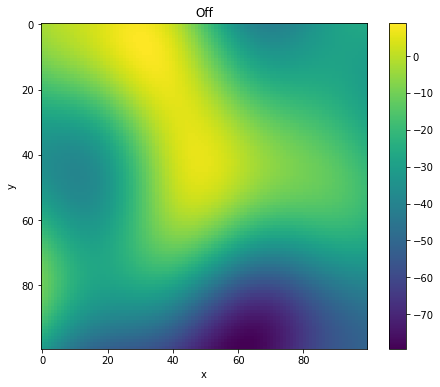

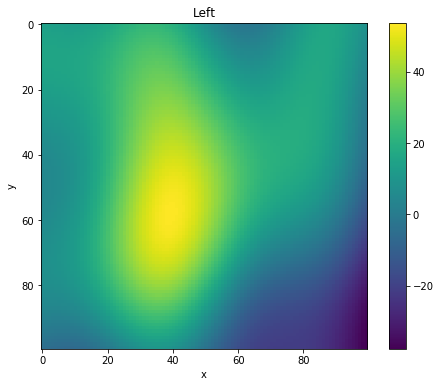

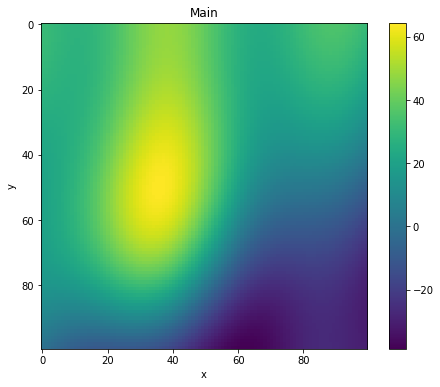

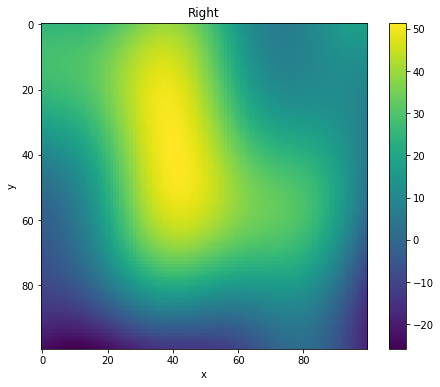

In [67]:
actions = ["Off", "Left", "Main", "Right"]

for i in range(len(actions)):
    plt.figure(figsize=(8,6))
    plt.imshow(q_estimates[i, :, :])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(actions[i])
    plt.colorbar()